In [1]:
!pip install jieba

In [3]:
import jieba
import jieba.analyse
import csv
import re
in_debug=False
#用正则表达式移除特殊符号
def remove_punc(line_sentence):
    multi_version = re.compile("-\{.*?(zh-hans|zh-cn):([^;]*?)(;.*?)?\}-")
    punctuation = re.compile("[-~!@#$%^&amp;*()_+`=\[\]\\\{\}\"|;':,./<>?·！@#￥%……&amp;*（）——+【】、；‘：“”，。、《》？「『」』]")
    line = multi_version.sub(r"\2", line_sentence)
    line = punctuation.sub(' ', line_sentence)
    return line

In [7]:
import spacy
# 加载英文空间小模型 停用词
en = spacy.load('en_core_web_sm')
sw = en.Defaults.stop_words

In [9]:
def cut_words(sentence):
    word_list =[]
    words = jieba.cut(remove_punc(sentence))  #默认精准模式
    for word in words:
         if word in sw:
             if in_debug:
                 print("ignore words:"+word)
             continue
         if len(word.strip())>1:
             word_list.append(word)

    return word_list

In [11]:
import pandas as pd
data=pd.read_excel('/content/Online Retail.xlsx')

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
import pandas as pd
import numpy as np
data = pd.read_excel(r'/content/Online Retail.xlsx',usecols = [2]) #读取第一列的数据
data_array = np.array(data.stack()) # 首先将pandas读取的数据转化为array
item_titles = data_array.tolist() # 然后转化为list形式
print(item_titles[:10])

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT']


In [21]:
print(item_titles[:10])

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT']


LAD

In [24]:
import gensim
from gensim.models import LdaModel  #导入gensim包
from gensim.corpora import Dictionary
from gensim import corpora, models  #导入gensim中的corpor（语料）

titles = item_titles
counter = 10
for title in titles:
    title_words_list = [cut_words(title)]
    dictionary = corpora.Dictionary(title_words_list)  #构建词典
    corpus = [ dictionary.doc2bow(title) for title in title_words_list ]   #语料向量化---遍历词的列表得出一个新的语料
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)  #分为2个主题
    print(lda.print_topics(num_topics=2, num_words=2)) #每个主题输出2个单词
    counter -=1
    if counter <0: break


[(0, '0.210*"HOLDER" + 0.202*"HEART"'), (1, '0.213*"WHITE" + 0.206*"HANGING"')]
[(0, '0.346*"LANTERN" + 0.339*"METAL"'), (1, '0.345*"WHITE" + 0.330*"METAL"')]
[(0, '0.206*"CREAM" + 0.205*"HEARTS"'), (1, '0.207*"HANGER" + 0.203*"COAT"')]
[(0, '0.172*"BOTTLE" + 0.171*"UNION"'), (1, '0.174*"KNITTED" + 0.172*"HOT"')]
[(0, '0.216*"HEART" + 0.201*"WHITE"'), (1, '0.211*"RED" + 0.209*"HOTTIE"')]
[(0, '0.268*"SET" + 0.252*"NESTING"'), (1, '0.261*"BABUSHKA" + 0.258*"BOXES"')]
[(0, '0.228*"LIGHT" + 0.204*"GLASS"'), (1, '0.209*"HOLDER" + 0.209*"FROSTED"')]
[(0, '0.257*"WARMER" + 0.251*"HAND"'), (1, '0.264*"UNION" + 0.252*"JACK"')]
[(0, '0.207*"DOT" + 0.206*"HAND"'), (1, '0.215*"POLKA" + 0.199*"WARMER"')]
[(0, '0.261*"COLOUR" + 0.252*"BIRD"'), (1, '0.262*"ASSORTED" + 0.259*"ORNAMENT"')]
[(0, '0.348*"POPPY" + 0.329*"PLAYHOUSE"'), (1, '0.346*"BEDROOM" + 0.339*"PLAYHOUSE"')]


画图改改 实在不行删掉

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

<ipython-input-38-56590c0ab06f>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=0,)  #刻度


[Text(0, 0, '85123a')]

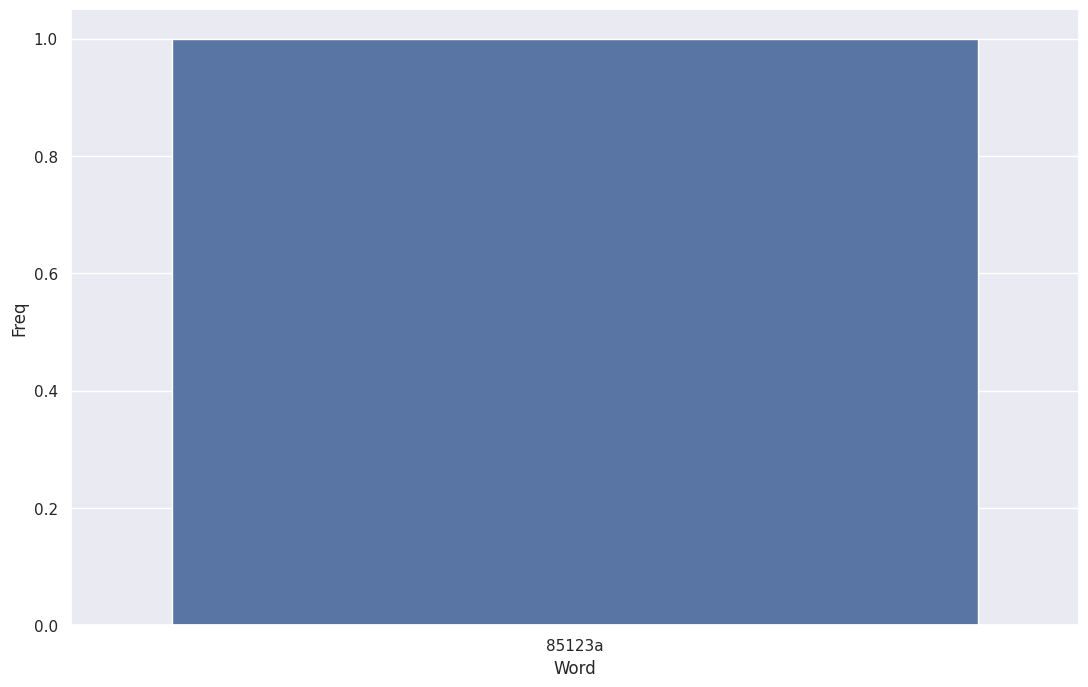

In [38]:
import pandas
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns  #绘图的库（统计图表）
#出现最频繁的单词（如果一个词的出现与他周围的词是独立的，我们就称之为unigram,也就是一元语言模型）
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(result_titles, n=20)
top_df = pandas.DataFrame(top_words)   #出现最频繁单词矩阵
top_df.columns=["Word", "Freq"]
#Barplot of most freq words（直方图）
sns.set(rc={'figure.figsize':(13,8)})
#plt.rcParams['font.sans-serif'] = ['SimHei']  #中文显示代码
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=0,)  #刻度


tf-idf

In [39]:
from sklearn.feature_extraction.text import CountVectorizer   #向量转换
from sklearn.feature_extraction.text import TfidfTransformer  #词频-逆文件频率
import re
#文本特征抽取
counter = 10
result_titles = []
for item in item_titles:
    result_titles.append(" ".join(cut_words(item[1])))
print(result_titles[:10])
len(result_titles) #100个title

cv=CountVectorizer(max_df=0.8,stop_words=stop_words_set, max_features=100, ngram_range=(1,3))
    #(max_df=0.8,阈值，当超过0.8时，则不会被选择为关键词)
    #(max_features=100,对关键词进行降序排序，取前100个)
    #(ngram_range=(1,3),词组切分的长度范围)
len(stop_words_set)

X=cv.fit_transform(result_titles) #通过fit_transform函数将文本中的词语转换为词频矩阵

print(X) #第0个列表元素，**词典中索引的元素**， 词频


IndexError: string index out of range